In [50]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

phi,Br=np.loadtxt("data.txt",unpack=True,skiprows=2) # make sure to chagne delimeiter for desire file


n=np.arange(1,11,1)

#radius measurments were taken at in meters
rad=0.1

#need to be summed from 0 to N-1, where N is total number of angular samples at any given z value
#convert from degrees to radians
phir=phi*(np.pi/180)
#counts the number of unique z and phi values for use later
N_phi=np.unique(phi)

print(len(N_phi))




104


In [51]:
#Defining the function for the Decompisiton equations
def Bnint(Br,phi,n):

    B=np.zeros_like(n,dtype=type(Br[0]))
    for lp in range(len(n)):

        for i in range(len(Br)-1):
            B[lp]+=(2/len(N_phi))*Br[i]*np.sin(n[lp]*phir[i])
            
    return B

def Anint(Br,phi,n):

    A=np.zeros_like(n,dtype=type(Br[0]))
    for lp in range(len(n)):
        for i in range(len(Br)-1):
            A[lp]+=(2/len(N_phi))*Br[i]*np.cos(n[lp]*phir[i])
    return A

#Assigning call backs for the normal and skew harmonics
norm_harms=Bnint(Br,phi,n)
skew_harms=Anint(Br,phi,n)



grad=np.abs(norm_harms[1])/(rad)
non_uniformity=((np.sum(np.abs(norm_harms))-np.abs(norm_harms[1]))/np.sum(np.abs(norm_harms)))*100

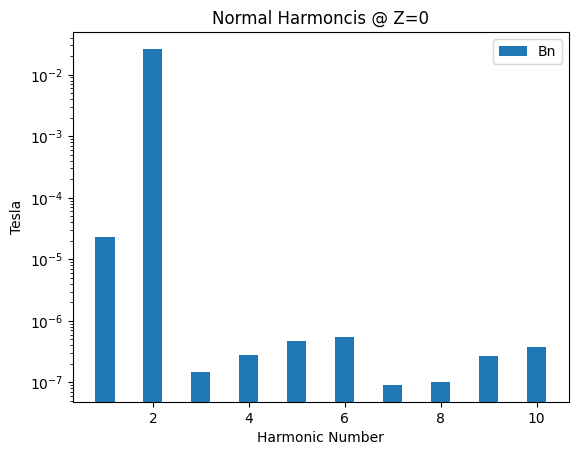

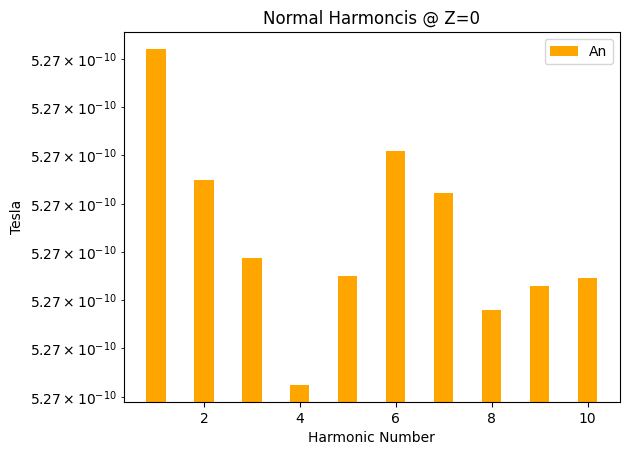

Quad Gradient: 0.26169425373677757 T/m
Non-uniformity 0.09783679482920729 %


In [52]:
plt.bar(n,np.abs(norm_harms), width=0.4, label="Bn")
plt.title('Normal Harmoncis @ Z=0')
plt.xlabel('Harmonic Number')
plt.ylabel('Tesla')
plt.yscale("log")
plt.legend()
plt.show()

plt.bar(n,np.abs(skew_harms), width=0.4, label="An", color='orange')
plt.title('Normal Harmoncis @ Z=0')
plt.xlabel('Harmonic Number')
plt.ylabel('Tesla')
plt.yscale("log")
plt.legend()
plt.show()

print("Quad Gradient:", grad, "T/m")
print("Non-uniformity",non_uniformity, "%")

In [53]:
print(norm_harms)
print(skew_harms)

[ 2.33567105e-05  2.61694254e-02 -1.45846299e-07 -2.75662253e-07
  4.72818148e-07 -5.41264318e-07  9.12052778e-08 -1.00690705e-07
  2.67233446e-07 -3.76970024e-07]
[-5.27000001e-10  5.27000000e-10 -5.27000000e-10  5.26999999e-10
 -5.27000000e-10  5.27000001e-10 -5.27000000e-10  5.27000000e-10
 -5.27000000e-10  5.27000000e-10]
